# The Capital Asset Pricing Model

*"The capital asset pricing model (CAPM) is a model that describes the relationship between systematic risk and expected return for assets, particularly stocks. CAPM is widely used throughout finance for the pricing of risky securities, generating expected returns for assets given the risk of those assets and calculating costs of capital."* (Investopedia)

In this case we will use the SP500 as the benchmark and Apple stock as the stock on which we will apply the CAPM approach

# Load libraries

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [109]:
import quandl
quandl.ApiConfig.api_key = 'xxxxx' 

## Load Data

In [81]:
start = pd.to_datetime('2010-01-01')
end = pd.to_datetime('2018-01-01')

In [82]:
#load SP500
SP500 = quandl.get("CHRIS/CME_SP1.4",start_date=start,end_date=end)#4 to keep only Last/CLose
# load Apple
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end) # 11 to get ajdusted close

In [83]:
len(aapl),len(SP500) # size of dataframes are not the same, we should clean this

(2011, 2004)

In [84]:
SP500.columns = ['SP500'] # change column title

In [85]:
df = SP500 # create dataframe to clean missing dates

In [86]:
df['aapl'] = aapl # add Apple to the dataframe

In [87]:
df.head() # check how new dataframe looks like

,SP500,aapl
Date,,
2010-01-04,1128.8,27.503268
2010-01-06,1133.0,27.112585
2010-01-07,1137.5,27.062465
2010-01-08,1141.6,27.242385
2010-01-11,1142.5,27.002063


In [88]:
df = df.dropna() # drop NA fron dataframe

In [89]:
len(df) # check length of new dataframe

1999

In [90]:
#SP500 = df['SP500']
#aapl = df['aapl']
#SP500.columns = ['SP500']

In [93]:
df.head()

,SP500,aapl,SP500_Cumul,aapl_Cumul
Date,,,,
2010-01-04,1128.8,27.503268,1.000000,1.000000
2010-01-06,1133.0,27.112585,1.003721,0.985795
2010-01-07,1137.5,27.062465,1.007707,0.983973
2010-01-08,1141.6,27.242385,1.011339,0.990514
2010-01-11,1142.5,27.002063,1.012137,0.981777


## Compute Cumulative Returns

In [96]:
df['SP500_Cumul'] = df['SP500']/df['SP500'].iloc[0]
df['aapl_Cumul'] = df['aapl']/df['aapl'].iloc[0]

## Plot Apple against SP500

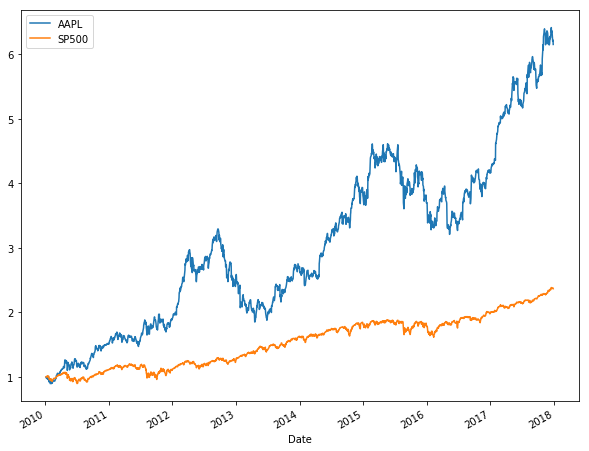

In [97]:
df['aapl_Cumul'].plot(label='AAPL',figsize=(10,8))
df['SP500_Cumul'].plot(label='SP500')
plt.legend()

## Compute daily return

In [101]:
df['SP500_daily'] = df['SP500'].pct_change(1)
df['aapl_daily'] = df['aapl'].pct_change(1)

## Compute Beta, Alpha and Residuals

In [102]:
df.head()

,SP500,aapl,SP500_Cumul,aapl_Cumul,aapl daily,SP500 daily,SP500_daily,aapl_daily
Date,,,,,,,,
2010-01-04,1128.8,27.503268,1.000000,1.000000,NaN,NaN,NaN,NaN
2010-01-06,1133.0,27.112585,1.003721,0.985795,-0.014205,0.003721,0.003721,-0.014205
2010-01-07,1137.5,27.062465,1.007707,0.983973,-0.001849,0.003972,0.003972,-0.001849
2010-01-08,1141.6,27.242385,1.011339,0.990514,0.006648,0.003604,0.003604,0.006648
2010-01-11,1142.5,27.002063,1.012137,0.981777,-0.008822,0.000788,0.000788,-0.008822


In [104]:
beta,alpha,r_value,p_value,std_err = stats.linregress(df['aapl_daily'].iloc[1:],df['SP500_daily'].iloc[1:])

## Define Beta, Alpha and noise

In [105]:
beta

0.31592768372326901

In [107]:
alpha

0.00014809318192613769

In [108]:
r_value

0.53669048764428717